In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print('We have a {} rows and {} columns of data'.format(data.shape[0], data.shape[1]))

We have a 768 rows and 9 columns of data


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We dont have any null values and the type of data are already appropriate

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


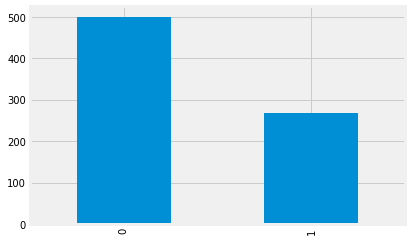

In [7]:
data['Outcome'].value_counts().plot(kind='bar');

From describe() syntax, we can get statistical summarize from our data. We have zero values on Glucose, BloodPressure, SkinThickness, Insulin and BMI columns which are not making any sense

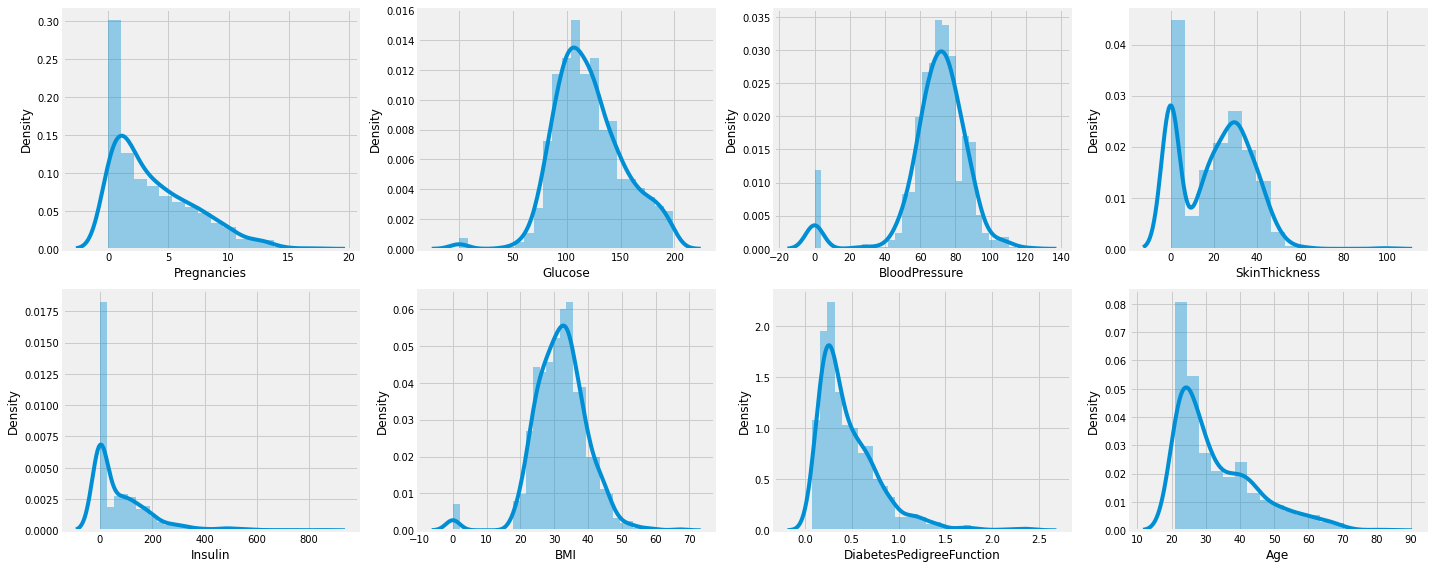

In [8]:
data_features = data.drop('Outcome', axis=1).columns.to_list()
plt.figure(figsize=(20,8))
for i in range(0, len(data_features)):
    plt.subplot(2,4, i+1)
    #plt.subplot(1, len(data_features), i+1)
    sns.distplot(x=data[data_features[i]])
    plt.xlabel(data_features[i])
    plt.tight_layout();

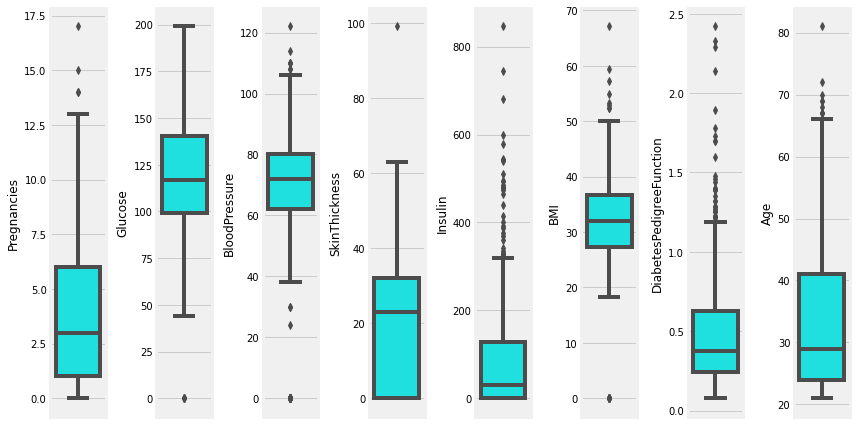

In [9]:
plt.figure(figsize=(12,6))

for i in range(0, len(data_features)):
    plt.subplot(1, len(data_features), i+1)
    sns.boxplot(y=data[data_features[i]], color='cyan')
    plt.tight_layout()

Normally distributed features: Glucose, BloodPressure, BMI

Positively skewed features: Pregnancies, Insulin, DiabetesPedigreeFunction, Age

## Handling Zero Values

In [10]:
containing_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [11]:
data[containing_zero] = np.where(data[containing_zero]==0, np.nan, data[containing_zero])

In [12]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
#Imputation on normally distributed features
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].mean())
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())

#Imputation on skewed features
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())

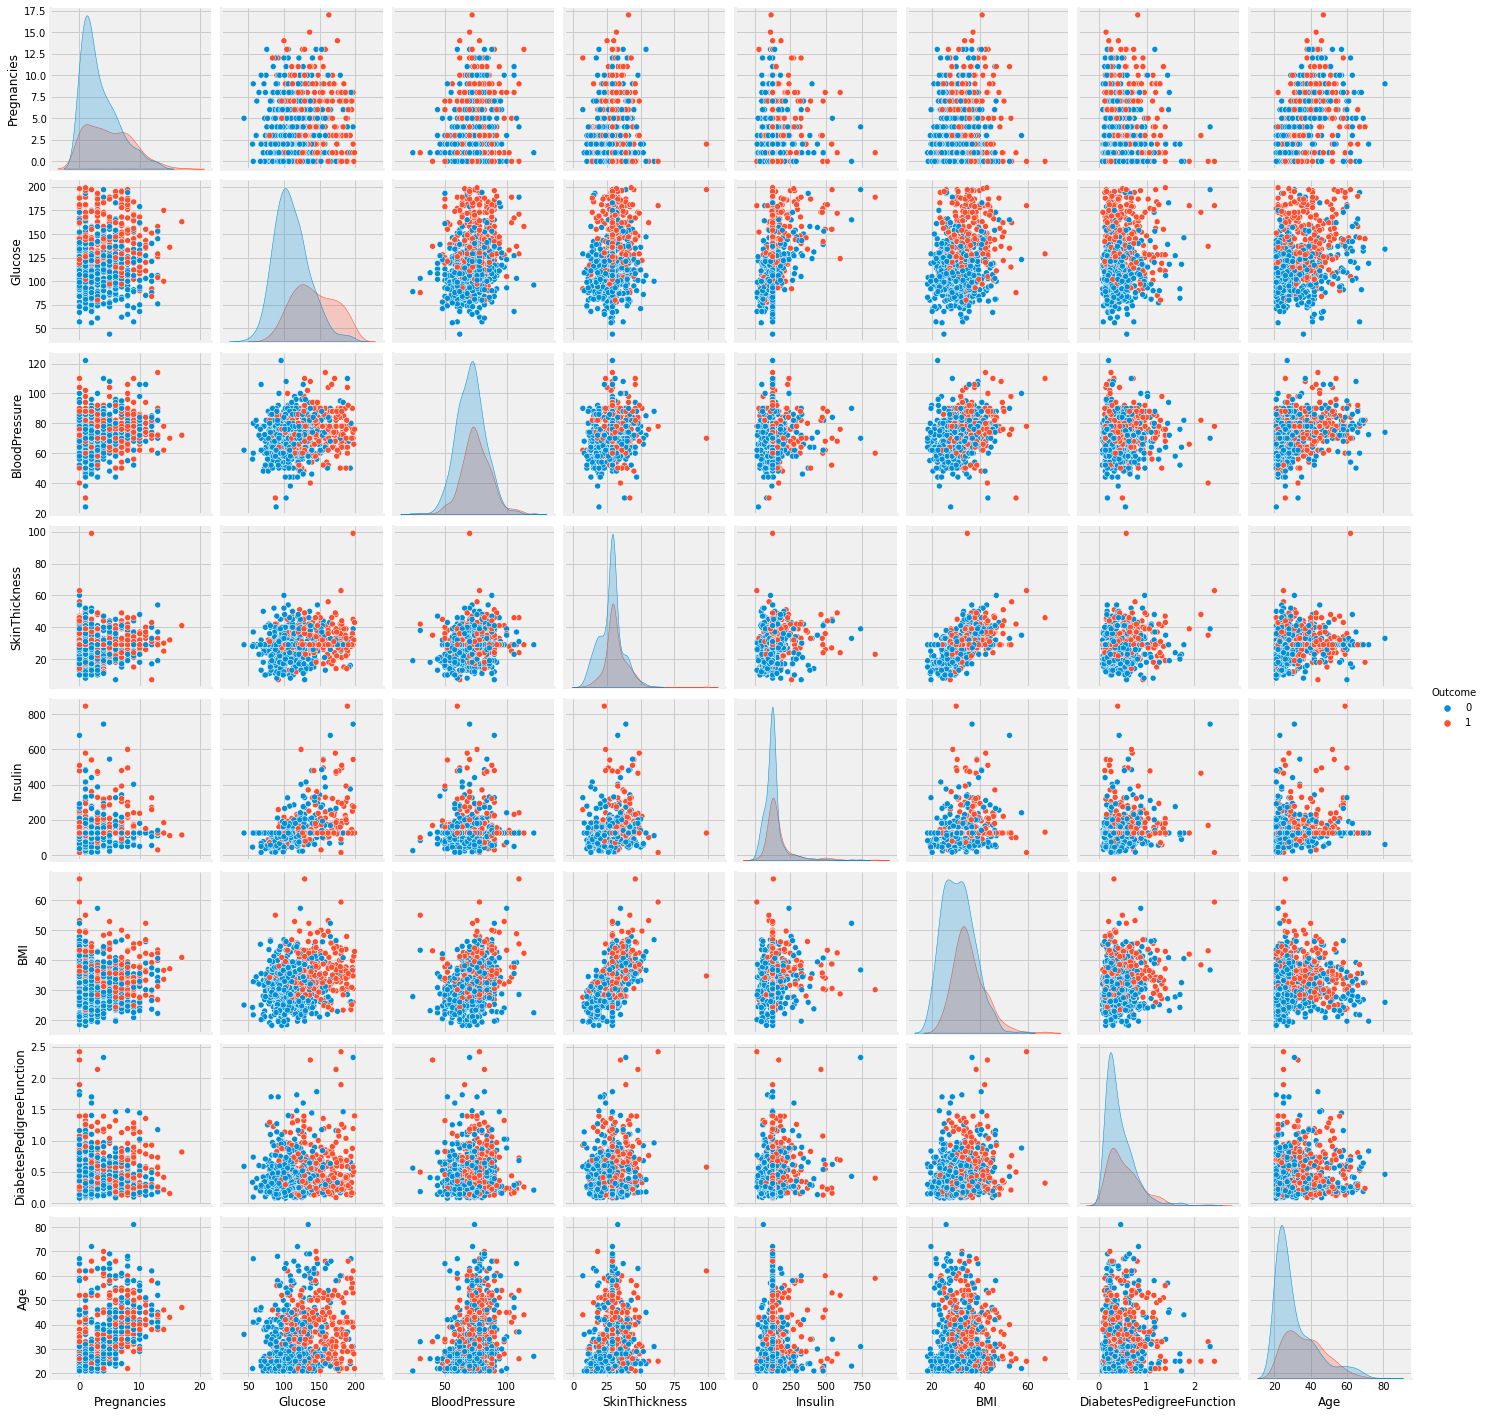

In [14]:
sns.pairplot(data, hue='Outcome')

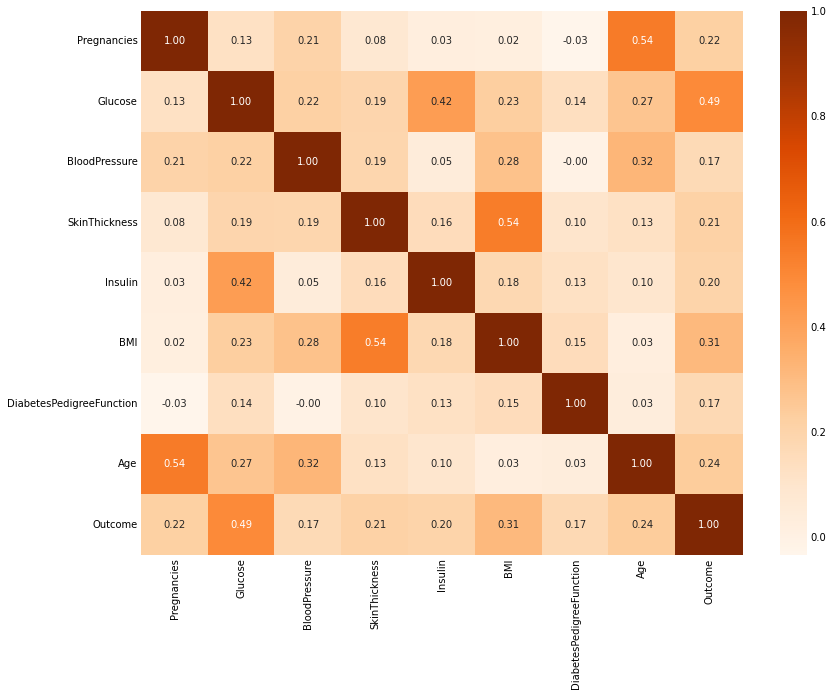

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot = True, cmap = "Oranges",  fmt='.2f');

# Modeling

In [16]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [17]:
#Standard Scaling
col = X.columns
std = StandardScaler()
X = std.fit_transform(X)
X = pd.DataFrame(data = X, columns = col)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.548980,5.484909,-0.020496


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
classifier_svm = SVC(kernel = 'rbf', random_state = 42)
classifier_svm.fit(X_train, y_train)
y_pred = classifier_svm.predict(X_test)
print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")

print(classification_report(y_test, y_pred))

Train score : 0.8306188925081434
Test score : 0.7467532467532467
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.67      0.58      0.62        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



In [20]:
classifier_knn = KNeighborsClassifier(n_neighbors=10)
classifier_knn.fit(X_train, y_train)
y_pred = classifier_knn.predict(X_test)
print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")

print(classification_report(y_test, y_pred))

Train score : 0.8029315960912052
Test score : 0.7597402597402597
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        99
           1       0.70      0.58      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.75       154



In [21]:
classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier_tree.fit(X_train, y_train)
y_pred = classifier_tree.predict(X_test)
print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")

print(classification_report(y_test, y_pred))

Train score : 1.0
Test score : 0.7012987012987013
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        99
           1       0.58      0.62      0.60        55

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.70      0.70       154



In [27]:
classifier_forest = RandomForestClassifier(random_state = 42)
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)
print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")

print(classification_report(y_test, y_pred))

Train score : 1.0
Test score : 0.7662337662337663
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



# Hyperparameter Tuning

In [23]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

parameters = {
    'n_estimators': [25, 50, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 20, 25, 30], 
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 5, 8]
}
# Run the grid search
grid_obj = GridSearchCV(estimator = rf,
                        param_grid = parameters,
                        scoring = 'accuracy'
                        )
grid_obj = grid_obj.fit(X_train, y_train)

rf = grid_obj.best_estimator_

rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_estimators=50)

In [24]:
y_pred = rf.predict(X_test)


print(f"Train score : {rf.score(X_train, y_train)}\nTest score : {rf.score(X_test, y_test)}")
print(classification_report(y_test, y_pred))

Train score : 0.8925081433224755
Test score : 0.7792207792207793
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        99
           1       0.69      0.69      0.69        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



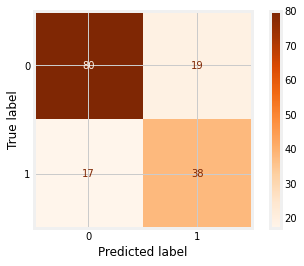

In [25]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(classifier_forest, X_test, y_test, cmap='Oranges')  
plt.show()

## Feature Importance

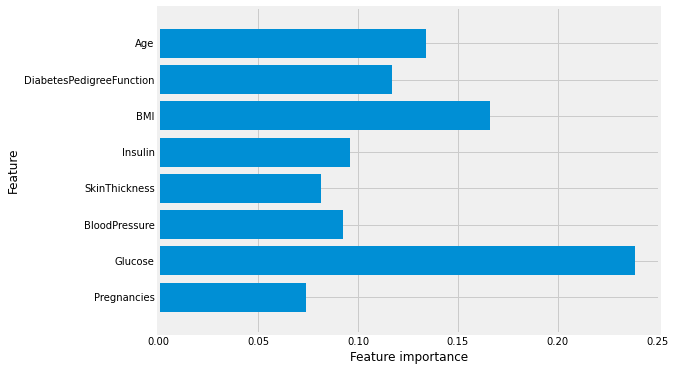

In [26]:
def plot_feature_importances(model):
    plt.figure(figsize=(8,6))
    n_features = len(X.columns.to_list())
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances(classifier_forest)